# **LIBRERIAS**

In [115]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter, LabelSet, Span
from bokeh.io import push_notebook




#  **CARGA DE DATOS**



In [116]:
# URL de la API
url = 'https://api.covidtracking.com/v1/states/daily.json'

try:
    # Enviar solicitud GET a la API
    response = requests.get(url)
    
    # Verificar que la solicitud fue exitosa
    response.raise_for_status()  # Lanza un HTTPError para respuestas de error

    # Intentar convertir la respuesta JSON en un DataFrame
    try:
        data = response.json()
        df = pd.DataFrame(data)
    except ValueError as e:
        print(f"Error al convertir la respuesta a JSON: {e}")

except requests.exceptions.HTTPError as http_err:
    print(f"Error HTTP ocurrido: {http_err}")

except requests.exceptions.ConnectionError as conn_err:
    print(f"Error de conexión ocurrido: {conn_err}")

except requests.exceptions.Timeout as timeout_err:
    print(f"Error de tiempo de espera ocurrido: {timeout_err}")

except requests.exceptions.RequestException as req_err:
    print(f"Error en la solicitud ocurrido: {req_err}")

except Exception as e:
    print(f"Error inesperado: {e}")


In [117]:
df.head()
        

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


# **INSPECCIÓN DE DATOS**

In [118]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [119]:
# Resumen estadístico de las columnas numéricas
df.describe()

,date,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,2.078000e+04,2.059200e+04,9271.000000,1.329000e+04,2138.000000,2.061400e+04,17339.000000,12382.000000,11636.000000,3789.000000,...,2.078000e+04,20780.000000,2.078000e+04,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0
mean,2.020244e+07,1.651560e+05,21729.123719,8.482246e+05,1659.862956,2.186936e+06,1190.576965,9262.762478,359.621176,1934.191607,...,7.063208e+05,17508.388210,7.061500e+05,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0
std,3.608732e+03,3.267852e+05,45471.459778,1.344501e+06,4671.028548,4.436508e+06,2060.041207,12620.544081,594.831150,1953.329983,...,1.300339e+06,33586.022461,1.299997e+06,60.162742,208.237151,0.0,0.0,0.0,0.0,0.0
min,2.020011e+07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,0.000000,6.000000,...,0.000000e+00,-130545.000000,0.000000e+00,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020060e+07,5.753750e+03,773.500000,5.394125e+04,43.000000,1.040498e+05,166.500000,985.250000,60.000000,501.000000,...,2.577975e+04,1205.750000,2.565875e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020090e+07,4.606450e+04,4491.000000,3.059720e+05,212.500000,6.552670e+05,531.000000,4472.000000,172.000000,1295.000000,...,1.937255e+05,6125.000000,1.935810e+05,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020120e+07,1.779580e+05,19553.000000,1.056611e+06,1295.750000,2.264766e+06,1279.000000,12248.500000,380.000000,2451.000000,...,7.737408e+05,19086.500000,7.737408e+05,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0
max,2.021031e+07,3.501394e+06,365961.000000,1.018694e+07,64400.000000,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,...,1.125679e+07,473076.000000,1.124825e+07,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0


In [120]:
#Comprobación del tipo de las columnas del dataframe

df.dtypes

date                             int64
state                           object
positive                       float64
probableCases                  float64
negative                       float64
pending                        float64
totalTestResultsSource          object
totalTestResults               float64
hospitalizedCurrently          float64
hospitalizedCumulative         float64
inIcuCurrently                 float64
inIcuCumulative                float64
onVentilatorCurrently          float64
onVentilatorCumulative         float64
recovered                      float64
lastUpdateEt                    object
dateModified                    object
checkTimeEt                     object
death                          float64
hospitalized                   float64
hospitalizedDischarged         float64
dateChecked                     object
totalTestsViral                float64
positiveTestsViral             float64
negativeTestsViral             float64
positiveCasesViral       

# **LIMPIEZA DE DATOS**

In [121]:
#Identificar la cantidad de valores nulos o faltantes en cada columna del dataframe
df.isnull().sum()

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

<Axes: >

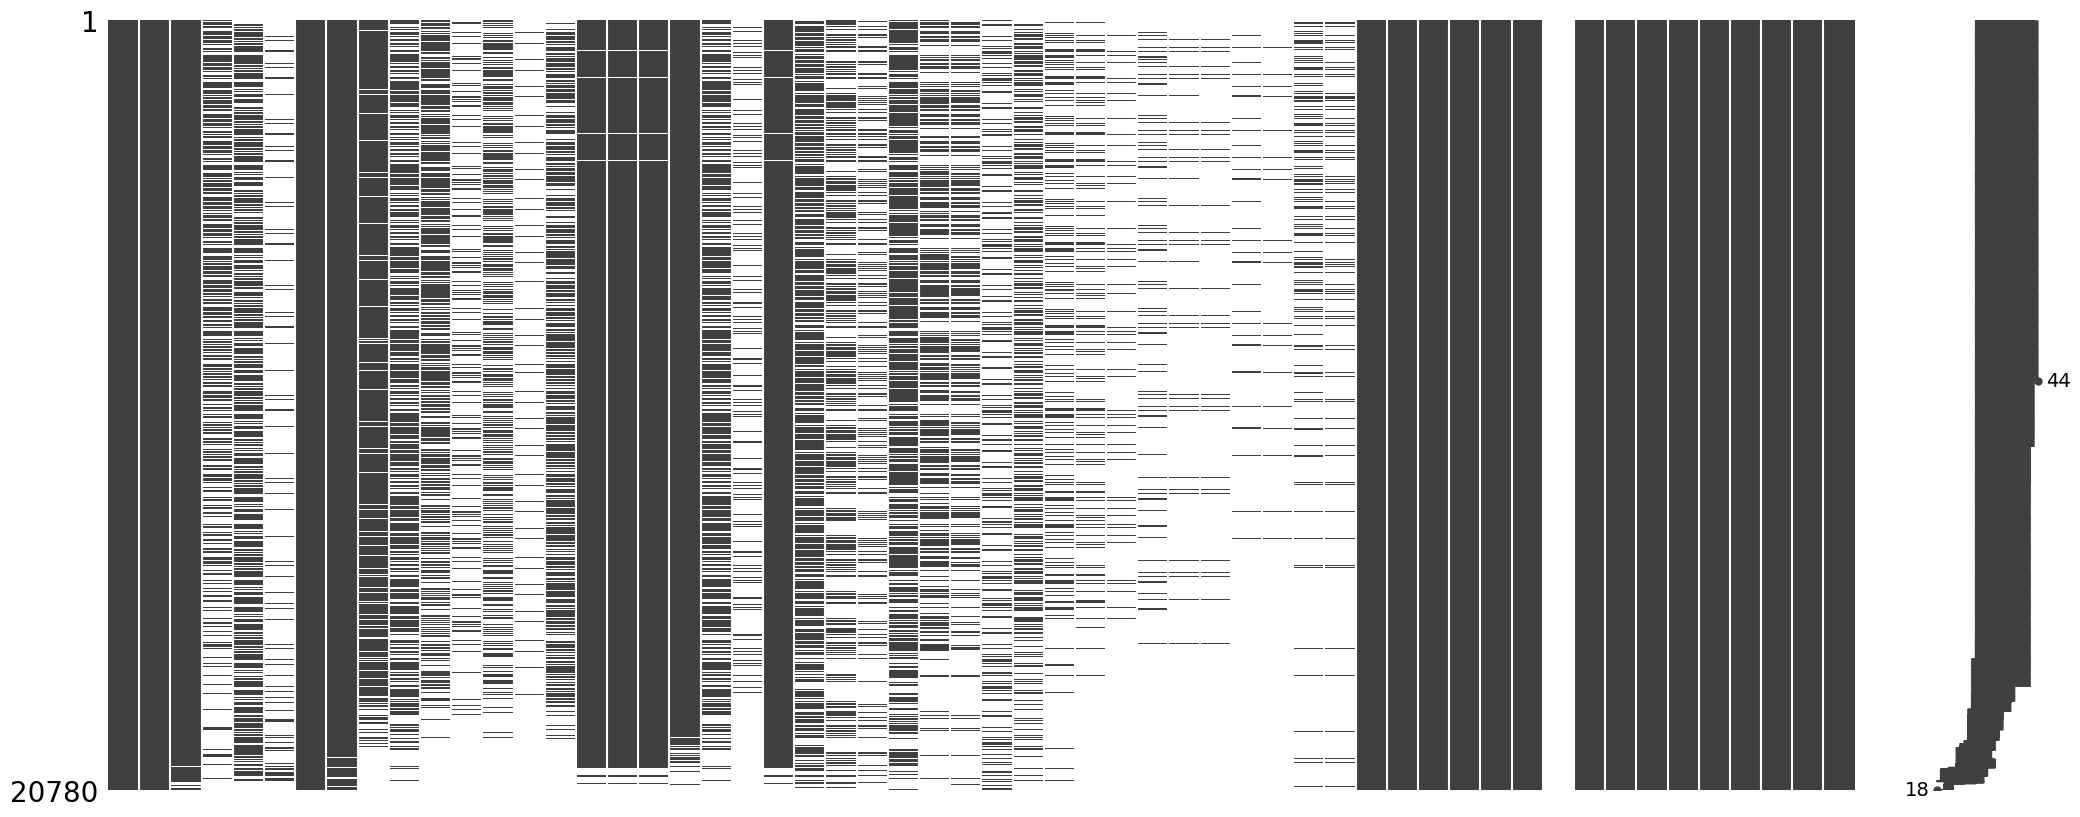

In [122]:
import missingno as msno
#visualizar gráficamente los valores faltantes o nulos 
msno.matrix(df)


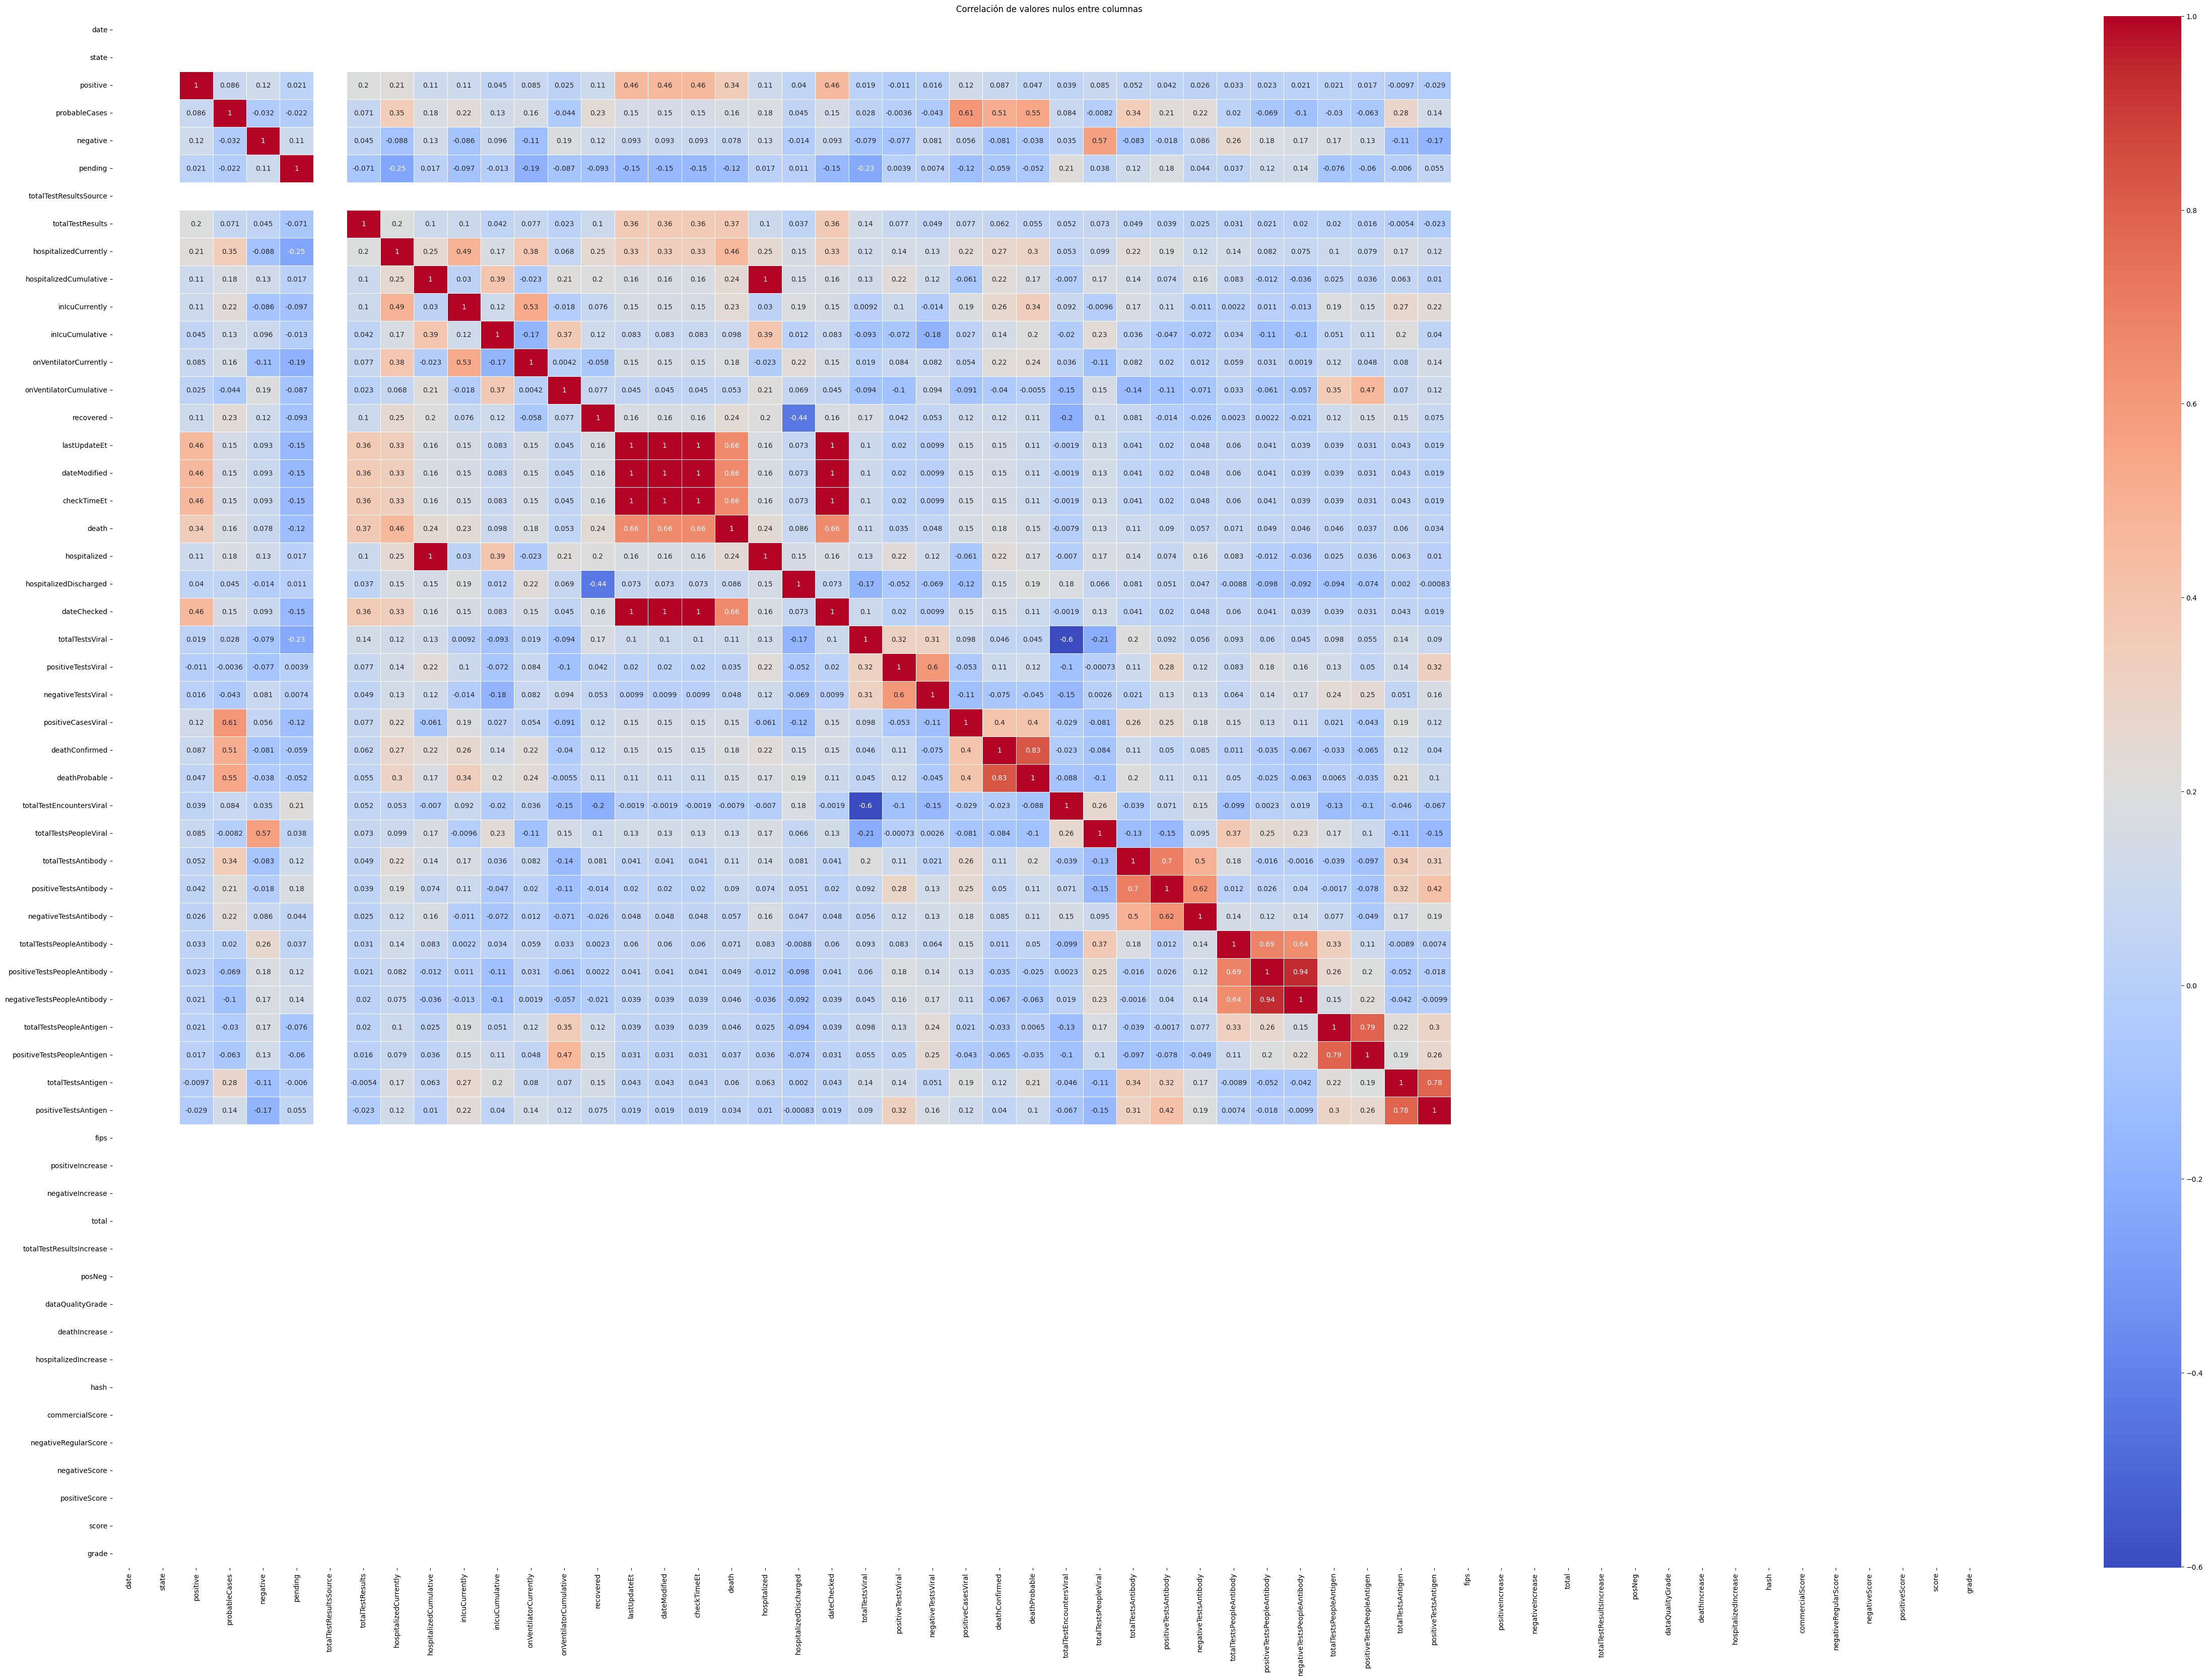

In [123]:
# Creamos una matriz de correlación de los valores nulos
correlation_matrix = df.isnull().corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(60, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación de valores nulos entre columnas')
plt.show()


La gráfica muestra una matriz de correlación de valores nulos entre varias columnas de un conjunto de datos. Los colores representan el grado de correlación entre los valores nulos de las diferentes columnas, donde:

+ Rojo oscuro indica una alta correlación positiva (cercana a 1), es decir, cuando una columna tiene un valor nulo, la otra también tiende a tenerlo.

+ Azul oscuro indica una correlación negativa (cercana a -1), es decir, cuando una columna tiene un valor nulo, la otra tiende a tener un valor no nulo.

+ Valores más cercanos a 0 (colores claros) indican que no hay una correlación significativa entre los valores nulos de las columnas.

Observaciones generales:
+ Zonas rojas en la matriz indican que varias columnas tienen valores nulos que aparecen juntos. Esto sugiere que, en ciertos casos, faltan múltiples campos simultáneamente. Esto puede deberse a que los datos relacionados entre sí no se reportan o no aplican en ciertos casos.

+ Zonas azules indican que cuando una columna tiene un valor nulo, la otra no lo tiene. Esto puede significar que los campos están relacionados de manera que solo se completa uno de ellos en ciertos registros.

+ Las correlaciones más fuertes (rojo oscuro) indican una dependencia clara entre los valores faltantes de esas columnas, lo que sugiere que quizás provienen de la misma fuente o grupo de datos. Por ejemplo, es probable que los datos relacionados con hospitalizaciones (hospitalized, inIcuCurrently, onVentilatorCurrently) tiendan a faltar juntos en algunos casos.

C:\Users\maria\AppData\Local\Temp\ipykernel_23148\3093261832.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_totales = grupo_por_estado.apply(contar_nulos)


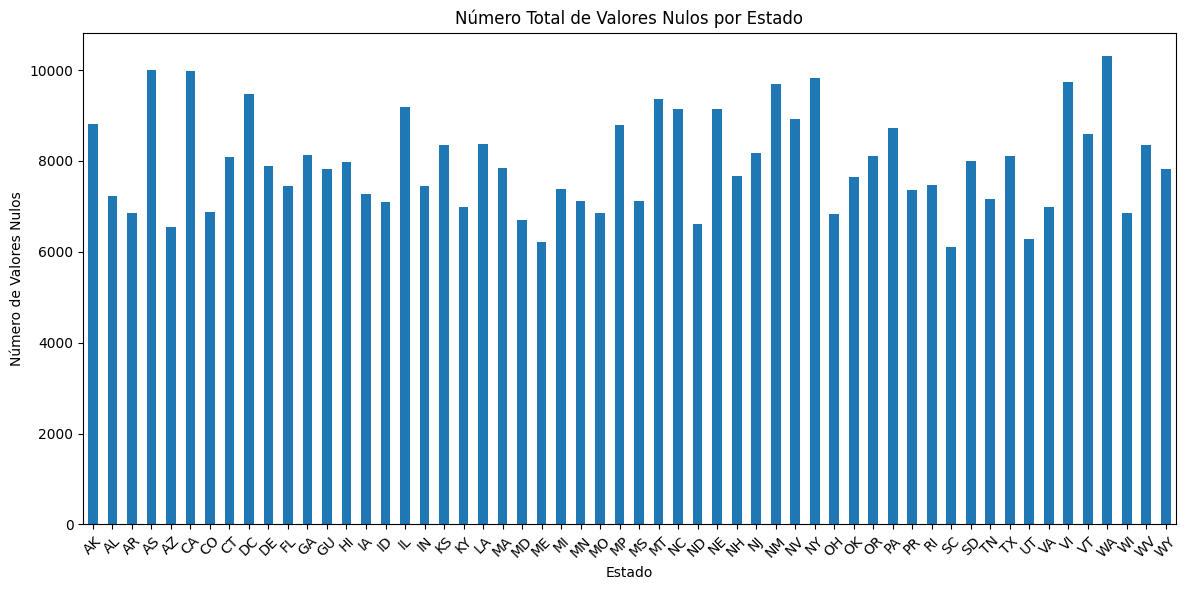

In [127]:
# Agrupar por estado
grupo_por_estado = df.groupby('state')

def contar_nulos(df_estado):
    # Elimina la columna 'state' del DataFrame del grupo
    df_sin_estado = df_estado.drop(columns='state')
    
    # Calcula la cantidad de valores nulos en el DataFrame sin la columna 'state'
    nulos = df_sin_estado.isnull().sum().sum()
    
    return nulos

nulos_totales = grupo_por_estado.apply(contar_nulos)

# Crear una figura y un eje
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
nulos_totales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Número Total de Valores Nulos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Valores Nulos')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


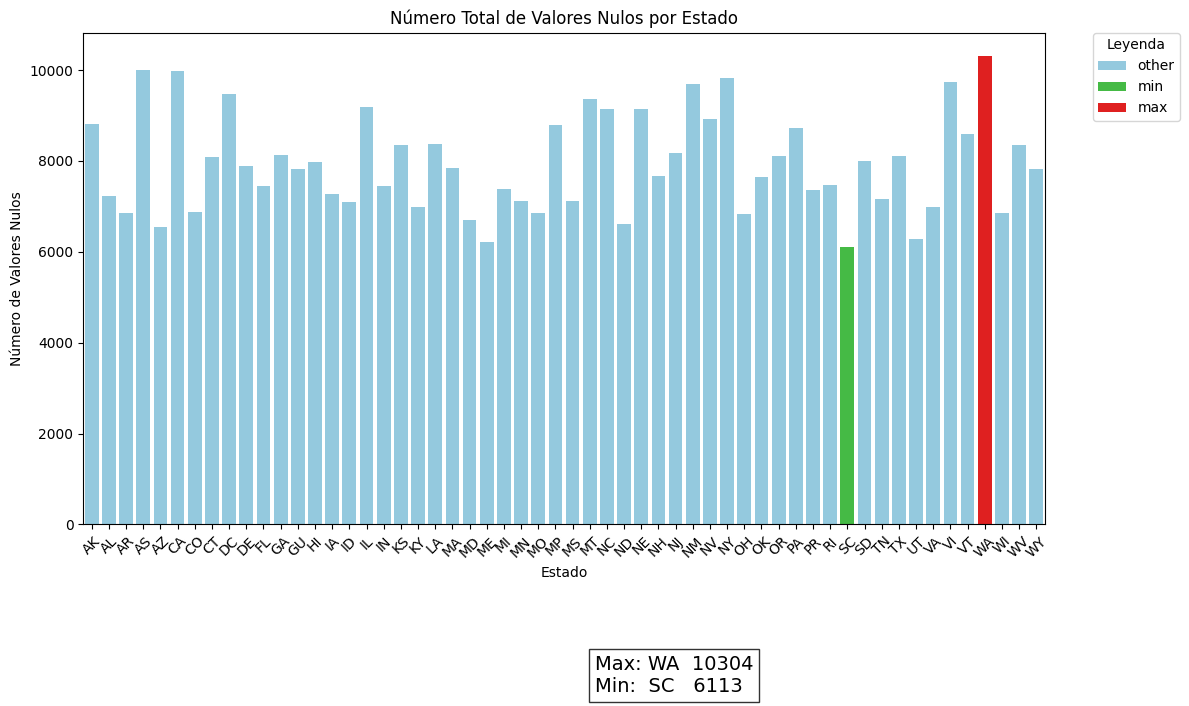

In [128]:
# Convertir la Serie en un DataFrame para seaborn
df_nulos_totales = nulos_totales.reset_index()
df_nulos_totales.columns = ['Estado', 'Número de Valores Nulos']

# Identificar el estado con el máximo y mínimo número de valores nulos
max_estado = df_nulos_totales['Estado'][df_nulos_totales['Número de Valores Nulos'].idxmax()]
max_valor = df_nulos_totales['Número de Valores Nulos'].max()

min_estado = df_nulos_totales['Estado'][df_nulos_totales['Número de Valores Nulos'].idxmin()]
min_valor = df_nulos_totales['Número de Valores Nulos'].min()

# Crear una columna de colores basada en la condición de máximo y mínimo
df_nulos_totales['Color'] = df_nulos_totales['Estado'].apply(
    lambda x: 'max' if x == max_estado else ('min' if x == min_estado else 'other')
)

# Crear una figura y ajustar su tamaño
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras con seaborn, usando 'hue' para asignar colores
sns.barplot(x='Estado', y='Número de Valores Nulos', data=df_nulos_totales,
            hue='Color', palette={'max': 'red', 'min': 'LimeGreen', 'other': 'SkyBlue'},
            dodge=False)

# Añadir títulos y etiquetas
plt.title('Número Total de Valores Nulos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Valores Nulos')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Configurar la leyenda para que no se superponga con el gráfico
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Ajustar el layout para evitar la superposición
plt.tight_layout()

# Añadir texto con los nombres de los estados y sus valores max y min debajo del gráfico
# Aalineación personalizada
text_str = (f'Max: {max_estado:<3} {max_valor:>5}\n'
            f'Min:  {min_estado:<3} {min_valor:>5}')
plt.figtext(0.5, -0.1, text_str,
            ha='left', va='top', fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()


# Mostrar la gráfica
plt.show()

In [129]:
# Función para calcular valores nulos totales y porcentaje de valores nulos
def calcular_nulos_por_estado(df):
    # Primero, excluye la columna de agrupación y luego calcula los valores nulos
    nulos_totales = df.groupby('state').apply(lambda x: x.drop(columns='state').isnull().sum().sum())
    total_filas = df.groupby('state').size()
    
    # Número total de columnas, excluyendo la columna de agrupación
    num_columnas = len(df.columns) - 1
    
    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (nulos_totales / (total_filas * num_columnas)) * 100
    
    return nulos_totales, porcentaje_nulos

# Obtener valores nulos y porcentajes
nulos_totales, porcentaje_nulos = calcular_nulos_por_estado(df)

# Encontrar el estado con más valores nulos
estado_con_mas_nulos = nulos_totales.idxmax()
cantidad_de_nulos = nulos_totales.max()

# Promedio del porcentaje de valores nulos en los otros estados
porcentaje_nulos_restantes = porcentaje_nulos.drop(estado_con_mas_nulos)
promedio_nulos_restantes = porcentaje_nulos_restantes.mean()

# Diferencia con el promedio de los otros estados
diferencia_con_promedio = porcentaje_nulos[estado_con_mas_nulos] - promedio_nulos_restantes

# Imprimir los resultados
print(f"El estado con más valores nulos es: {estado_con_mas_nulos}")
print(f"Cantidad de valores nulos en ese estado: {cantidad_de_nulos}")
print(f"Porcentaje de valores nulos en ese estado: {porcentaje_nulos[estado_con_mas_nulos]:.2f}%")
print(f"Promedio del porcentaje de valores nulos en los otros estados: {promedio_nulos_restantes:.2f}%")
print(f"Diferencia con el promedio de los otros estados: {diferencia_con_promedio:.2f}%")


El estado con más valores nulos es: WA
Cantidad de valores nulos en ese estado: 10304
Porcentaje de valores nulos en ese estado: 44.61%
Promedio del porcentaje de valores nulos en los otros estados: 38.84%
Diferencia con el promedio de los otros estados: 5.76%


C:\Users\maria\AppData\Local\Temp\ipykernel_23148\2606896489.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulos_totales = df.groupby('state').apply(lambda x: x.drop(columns='state').isnull().sum().sum())


Vamos a ver el resto de estados a ver si difiere mucho del resto

# **FILTRADO Y VISUALIZACIÓN DE DATOS**

In [ ]:
# Convertir 'date' a formato de fecha y extraer el año
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['year'] = df['date'].dt.year
        
# Mostrar los datos
df.head()


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,year
0,2021-03-07,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,,2021
1,2021-03-07,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,,2021
2,2021-03-07,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,,2021
3,2021-03-07,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,,2021
4,2021-03-07,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,,2021


In [ ]:
df_clean = df.copy()

# Definir las columnas numéricas
float_columns = [
    'positive', 'probableCases', 'negative', 'pending', 'totalTestResults',
    'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 
    'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 
    'recovered', 'death', 'hospitalized', 'hospitalizedDischarged', 
    'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral', 
    'positiveCasesViral', 'deathConfirmed', 'deathProbable', 
    'totalTestEncountersViral', 'totalTestsPeopleViral', 
    'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody', 
    'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody', 
    'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen', 
    'positiveTestsPeopleAntigen', 'totalTestsAntigen', 'positiveTestsAntigen'
]

int_columns = [
    'positiveIncrease', 'negativeIncrease', 'total', 
    'totalTestResultsIncrease', 'posNeg', 'deathIncrease', 
    'hospitalizedIncrease', 'commercialScore', 'negativeRegularScore', 
    'negativeScore', 'positiveScore', 'score'
]

# Rellenar valores nulos en columnas de tipo float64
for col in float_columns:
    mean_value = df_clean[col].mean()
    df_clean[col] = df_clean[col].fillna(mean_value)

# Rellenar valores nulos en columnas de tipo int64
for col in int_columns:
    mean_value = df_clean[col].mean()
    df_clean[col] = df_clean[col].fillna(mean_value)

# Ahora df_clean contiene los datos con valores nulos rellenados
df_clean.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,year
0,2021-03-07,AK,56886.0,21729.123719,8.482246e+05,1659.862956,totalTestsViral,1731628.0,33.000000,1293.000000,...,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,,2021
1,2021-03-07,AL,499819.0,107742.000000,1.931711e+06,1659.862956,totalTestsPeopleViral,2323788.0,494.000000,45976.000000,...,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,,2021
2,2021-03-07,AR,324818.0,69092.000000,2.480716e+06,1659.862956,totalTestsViral,2736442.0,335.000000,14926.000000,...,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,,2021
3,2021-03-07,AS,0.0,21729.123719,2.140000e+03,1659.862956,totalTestsViral,2140.0,1190.576965,9262.762478,...,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,,2021
4,2021-03-07,AZ,826454.0,56519.000000,3.073010e+06,1659.862956,totalTestsViral,7908105.0,963.000000,57907.000000,...,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,,2021


Número total de valores nulos en el DataFrame: 23244
Número de valores nulos por columna:
lastUpdateEt          616
dateModified          616
checkTimeEt           616
dateChecked           616
dataQualityGrade    20780
dtype: int64
Número de valores nulos por fila (primeras filas):
0    1
1    1
2    1
3    1
4    1
dtype: int64


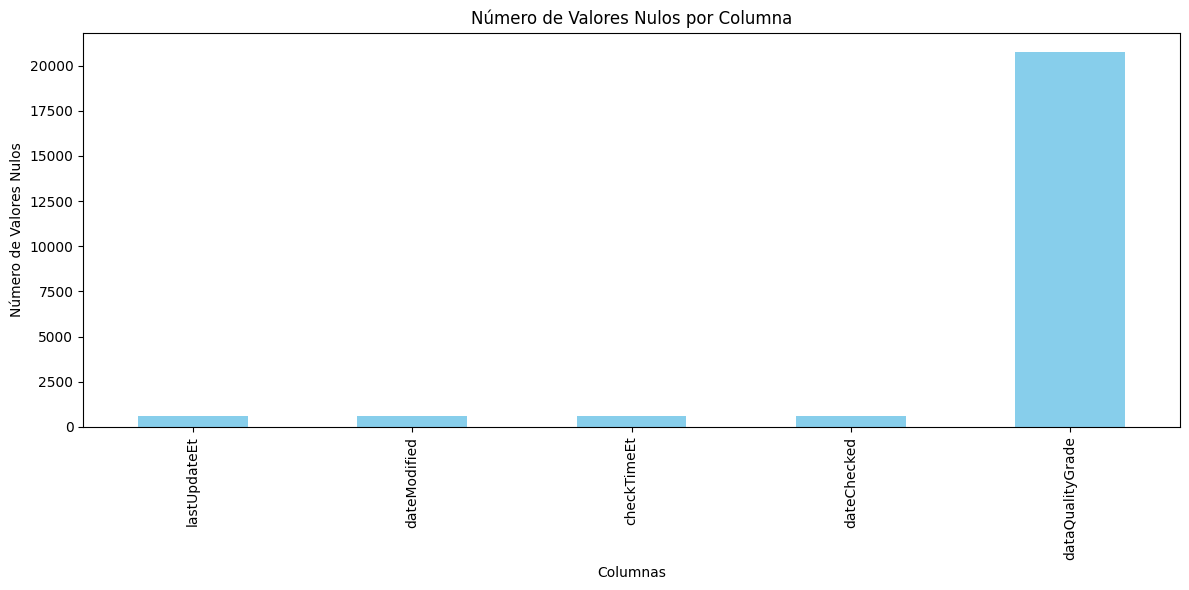

In [ ]:
# Verificar si hay valores nulos en todo el DataFrame
nulos_totales = df_clean.isnull().sum().sum()
print(f'Número total de valores nulos en el DataFrame: {nulos_totales}')

# Contar valores nulos por columna
nulos_por_columna = df_clean.isnull().sum()
print('Número de valores nulos por columna:')
print(nulos_por_columna[nulos_por_columna > 0])

# Contar valores nulos por fila (opcional)
nulos_por_fila = df_clean.isnull().sum(axis=1)
print('Número de valores nulos por fila (primeras filas):')
print(nulos_por_fila.head())

# Crear un gráfico de barras para visualizar valores nulos por columna
plt.figure(figsize=(12, 6))
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
columnas_con_nulos.plot(kind='bar', color='skyblue')
plt.title('Número de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


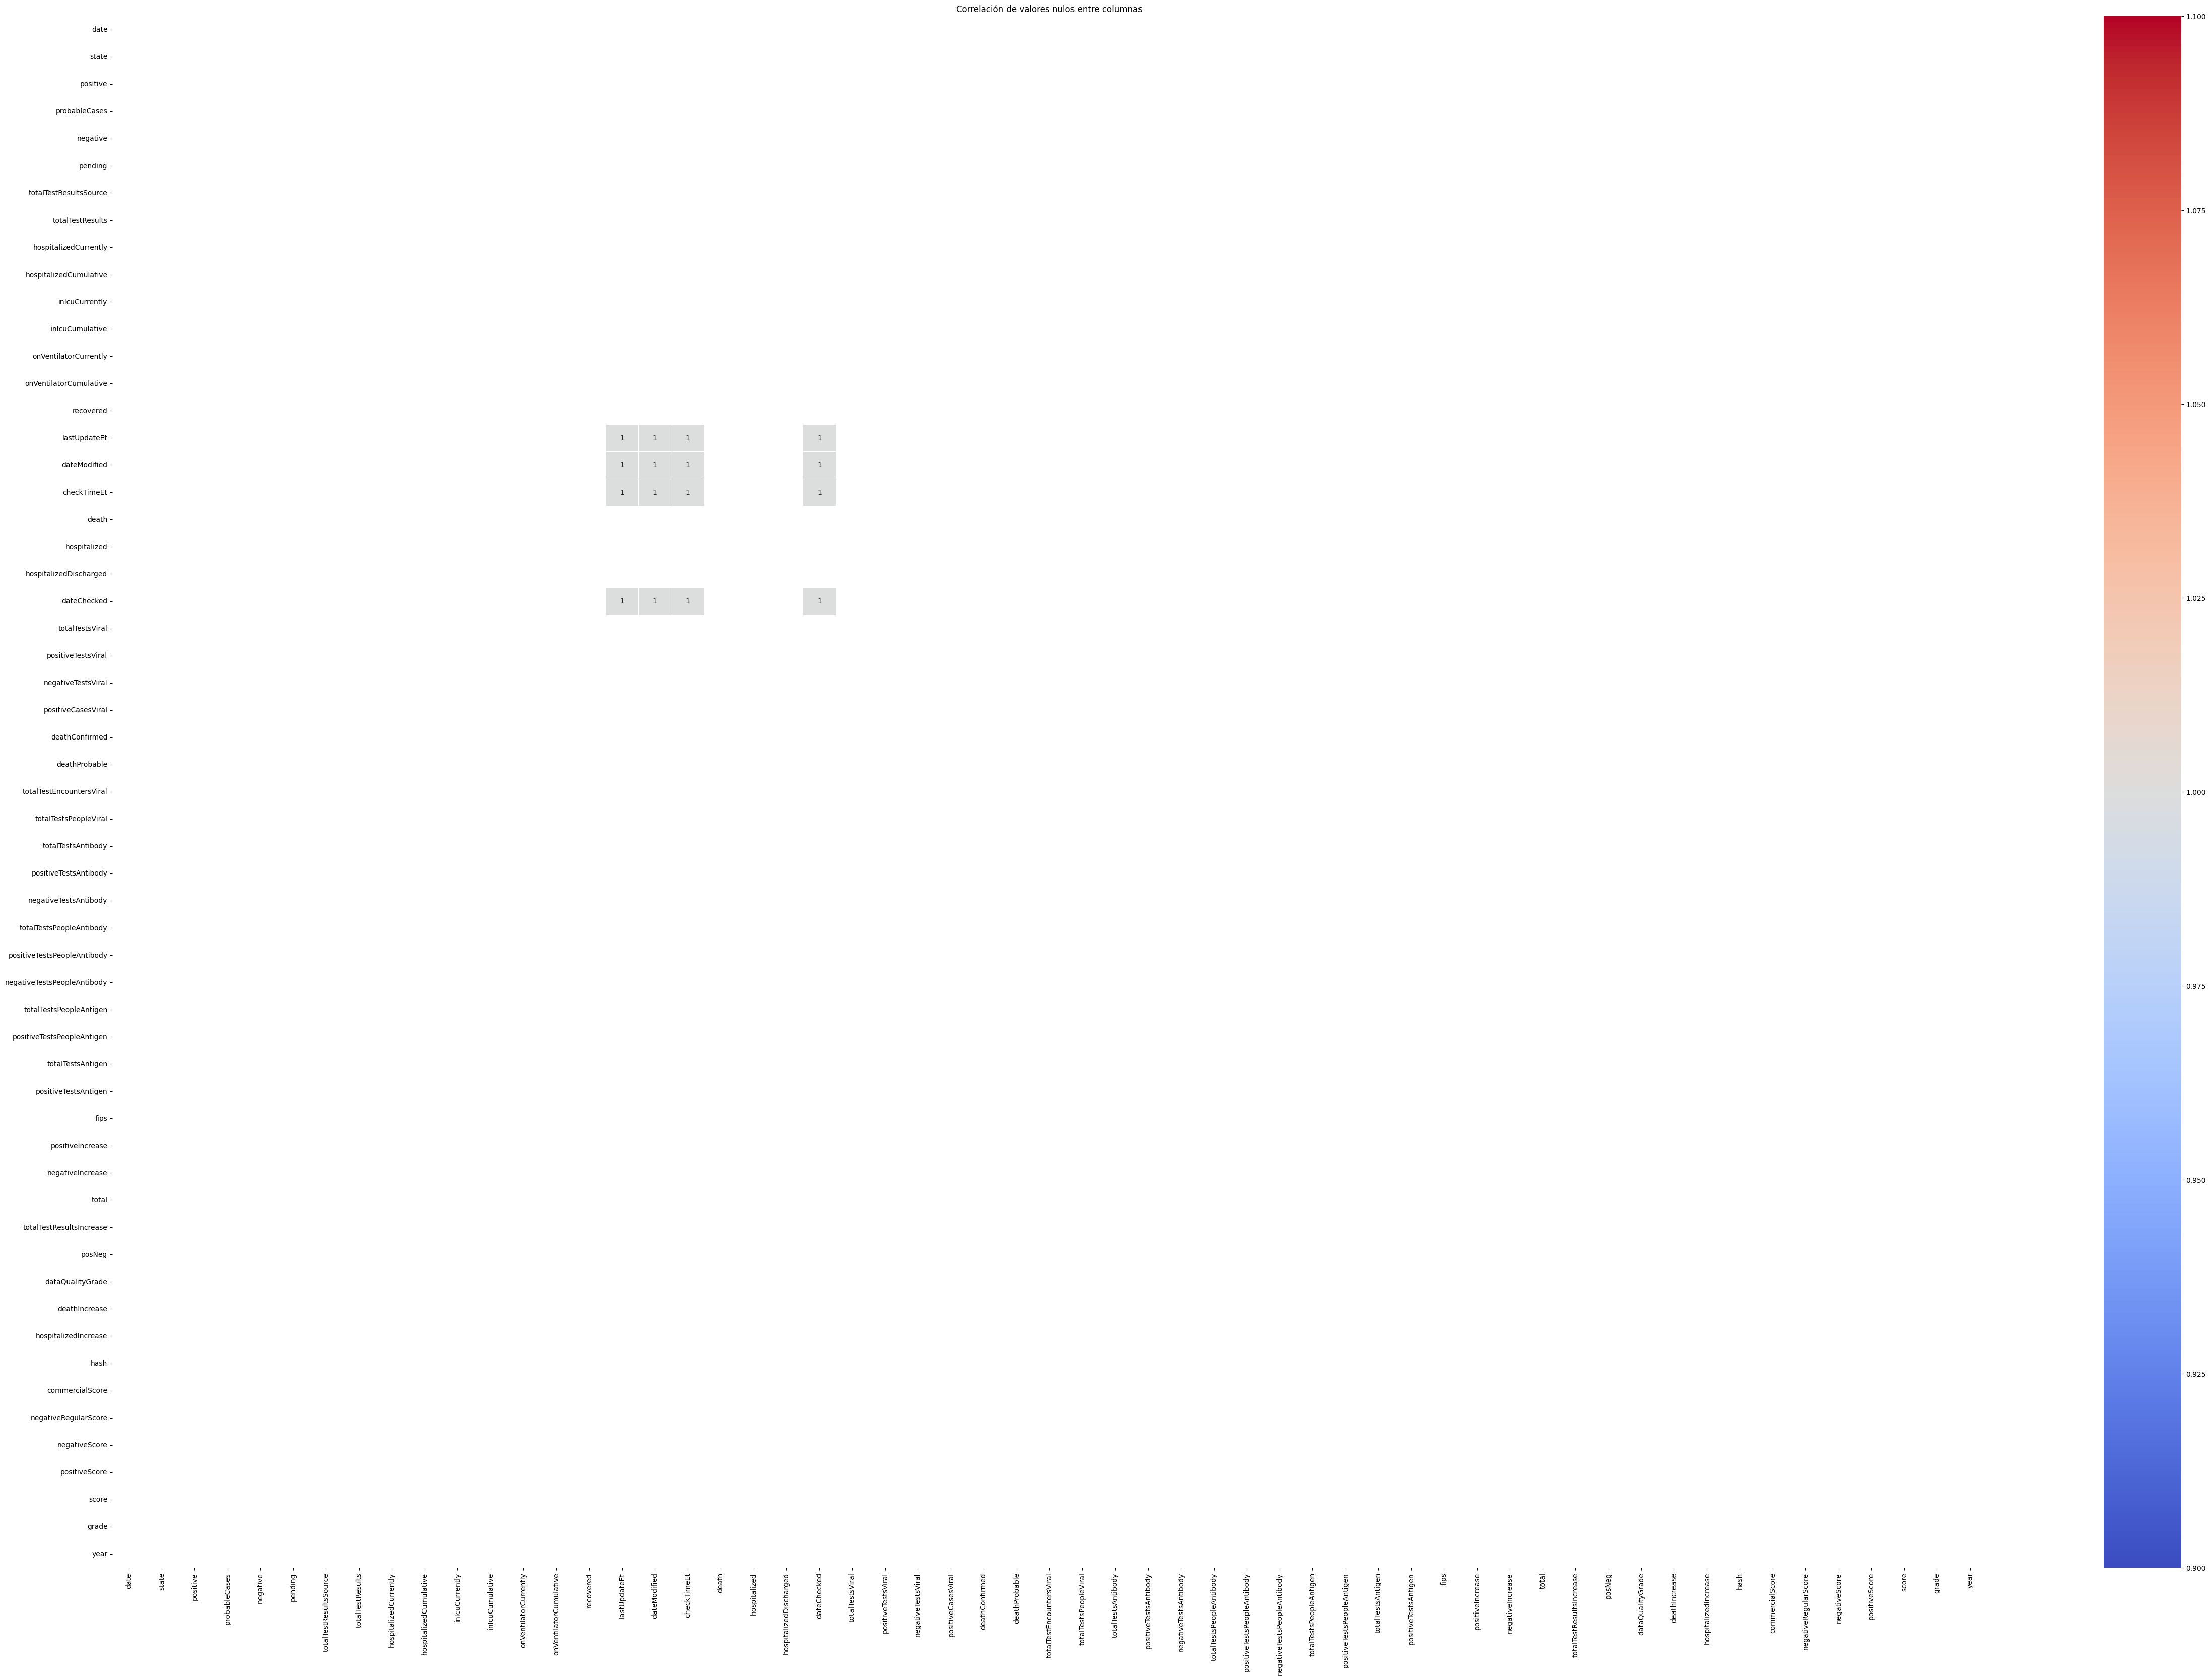

In [ ]:
# Creamos una matriz de correlación de los valores nulos
correlation = df_clean.isnull().corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(60, 40))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación de valores nulos entre columnas')
plt.show()

In [ ]:
# Verifica la cantidad de valores nulos en la columna
num_missing = df_clean['dataQualityGrade'].isnull().sum()
print(f'Número de valores nulos en "dataQualityGrade": {num_missing}')

# Verifica la cantidad total de registros
total_records = len(df_clean)
print(f'Número total de registros: {total_records}')

# Verifica el porcentaje de valores nulos
percent_missing = (num_missing / total_records) * 100
print(f'Porcentaje de valores nulos en "dataQualityGrade": {percent_missing:.2f}%')

df_clean = df_clean.drop(columns=['dataQualityGrade'])


Número de valores nulos en "dataQualityGrade": 20780
Número total de registros: 20780
Porcentaje de valores nulos en "dataQualityGrade": 100.00%


Vemos que todos los valores de esa columna son nulos, luego, se puede eliminar.

In [ ]:
# Eliminar columnas con valores nulos
df_clean_sin_nulos = df_clean.dropna(axis=1, how='any')

# Verificar el resultado
print(f'Número de columnas originales: {df_clean.shape[1]}')
print(f'Número de columnas después de eliminar las que tienen valores nulos: {df_clean_sin_nulos.shape[1]}')

# Verificar las primeras filas del nuevo DataFrame
print('Primeras filas del DataFrame sin columnas con valores nulos:')
df_clean_sin_nulos.head()


Número de columnas originales: 56
Número de columnas después de eliminar las que tienen valores nulos: 52
Primeras filas del DataFrame sin columnas con valores nulos:


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,year
0,2021-03-07,AK,56886.0,21729.123719,8.482246e+05,1659.862956,totalTestsViral,1731628.0,33.000000,1293.000000,...,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,,2021
1,2021-03-07,AL,499819.0,107742.000000,1.931711e+06,1659.862956,totalTestsPeopleViral,2323788.0,494.000000,45976.000000,...,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,,2021
2,2021-03-07,AR,324818.0,69092.000000,2.480716e+06,1659.862956,totalTestsViral,2736442.0,335.000000,14926.000000,...,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,,2021
3,2021-03-07,AS,0.0,21729.123719,2.140000e+03,1659.862956,totalTestsViral,2140.0,1190.576965,9262.762478,...,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,,2021
4,2021-03-07,AZ,826454.0,56519.000000,3.073010e+06,1659.862956,totalTestsViral,7908105.0,963.000000,57907.000000,...,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,,2021


Eliminamos el resto de columnas con valores nulos, ya que no las vemos necesarias

In [ ]:
# Identificar filas duplicadas
duplicates = df.duplicated()
df[duplicates]

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,year


No hay filas duplicadas

In [ ]:
df_clean_sin_nulos

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,year
0,2021-03-07,AK,56886.00000,21729.123719,8.482246e+05,1659.862956,totalTestsViral,1.731628e+06,33.000000,1293.000000,...,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,,2021
1,2021-03-07,AL,499819.00000,107742.000000,1.931711e+06,1659.862956,totalTestsPeopleViral,2.323788e+06,494.000000,45976.000000,...,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,,2021
2,2021-03-07,AR,324818.00000,69092.000000,2.480716e+06,1659.862956,totalTestsViral,2.736442e+06,335.000000,14926.000000,...,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,,2021
3,2021-03-07,AS,0.00000,21729.123719,2.140000e+03,1659.862956,totalTestsViral,2.140000e+03,1190.576965,9262.762478,...,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,,2021
4,2021-03-07,AZ,826454.00000,56519.000000,3.073010e+06,1659.862956,totalTestsViral,7.908105e+06,963.000000,57907.000000,...,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,0.00000,21729.123719,8.482246e+05,1659.862956,totalTestEncountersViral,2.186936e+06,1190.576965,9262.762478,...,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,,2020
20776,2020-01-16,WA,0.00000,21729.123719,8.482246e+05,1659.862956,totalTestEncountersViral,2.186936e+06,1190.576965,9262.762478,...,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,,2020
20777,2020-01-15,WA,0.00000,21729.123719,8.482246e+05,1659.862956,totalTestEncountersViral,2.186936e+06,1190.576965,9262.762478,...,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,,2020
20778,2020-01-14,WA,0.00000,21729.123719,8.482246e+05,1659.862956,totalTestEncountersViral,2.186936e+06,1190.576965,9262.762478,...,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,,2020


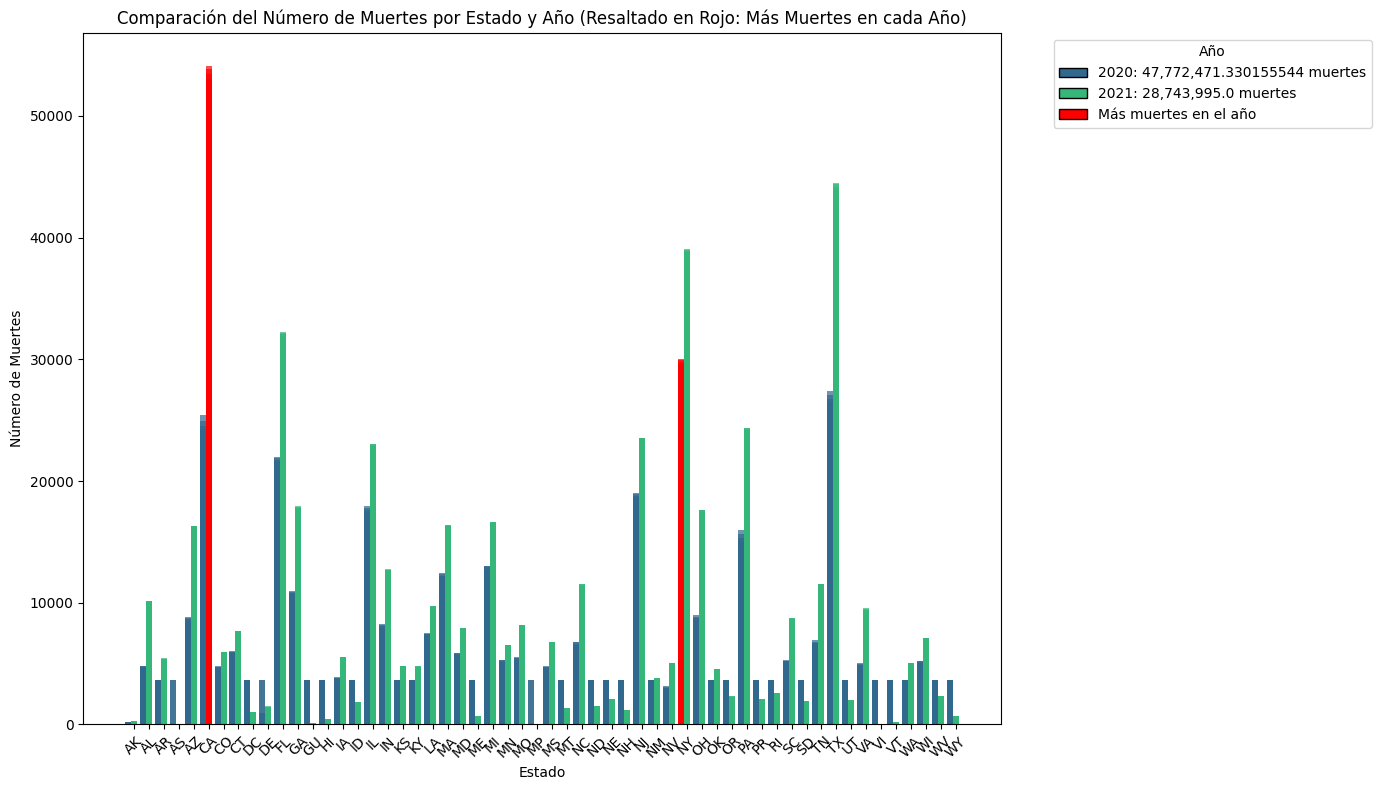

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Filtrar los datos para los años en el dataset
df_filtered = df_clean_sin_nulos[df_clean_sin_nulos['year'].isin(df_clean_sin_nulos['year'].unique())]

# Identificar el estado con más muertes para cada año
max_deaths_per_year = df_filtered.loc[df_filtered.groupby('year')['death'].idxmax()]

# Obtener la lista de todos los estados únicos
all_states = df_filtered['state'].unique()

# Ordenar los años de menor a mayor
sorted_years = sorted(df_filtered['year'].unique())

# Definir una paleta de colores para los diferentes años
year_palette = sns.color_palette("viridis", len(sorted_years))

# Calcular el total de muertes por año
total_deaths_per_year = df_filtered.groupby('year')['death'].sum()

# Crear una figura
plt.figure(figsize=(14, 8))

# Crear una posición para las barras (separar las barras de cada año)
bar_width = 0.8 / len(sorted_years)  # Ancho de las barras
x_offset = -0.4  # Desplazamiento inicial para las barras

# Crear el gráfico de barras manualmente para controlar los colores y la posición
for i, year in enumerate(sorted_years):
    # Filtrar los datos para cada año
    df_year = df_filtered[df_filtered['year'] == year]
    
    # Definir los colores: rojo para el estado con más muertes, el color del año para los demás
    colors = ['red' if (row['state'] in max_deaths_per_year[max_deaths_per_year['year'] == year]['state'].values) else year_palette[i] for _, row in df_year.iterrows()]
    
    # Calcular la posición de las barras
    year_x_positions = [all_states.tolist().index(state) + x_offset + i * bar_width for state in df_year['state']]
    
    # Crear el gráfico de barras
    plt.bar(year_x_positions, df_year['death'], width=bar_width, color=colors, alpha=0.7)

# Ajustar las etiquetas del eje x para mostrar los nombres de los estados
plt.xticks(range(len(all_states)), all_states, rotation=45)

# Añadir títulos y etiquetas
plt.title('Comparación del Número de Muertes por Estado y Año (Resaltado en Rojo: Más Muertes en cada Año)')
plt.xlabel('Estado')
plt.ylabel('Número de Muertes')

# Crear leyenda personalizada
legend_elements = [
    Patch(facecolor=year_palette[i], edgecolor='k', label=f'{year}: {total_deaths_per_year[year]:,} muertes') 
    for i, year in enumerate(sorted_years)
]
legend_elements.append(Patch(facecolor='red', edgecolor='k', label='Más muertes en el año'))

# Añadir la leyenda al gráfico
plt.legend(handles=legend_elements, title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Vemos que las muertes fueron mas numerosas en 2021, aunque no en el mismo estado.

In [ ]:
# Calcular el número de pacientes actualmente hospitalizados por estado
df_h_state = df_clean_sin_nulos.groupby('state')['death'].sum().reset_index()


# Encuentra el estado con el mayor número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['death'].idxmax()]

# Encuentra el estado con el menor número de hospitalizados
min_hospitalized_state = df_h_state.loc[df_h_state['death'].idxmin()]

# Agrega una columna para el color
df_h_state['Color'] = 'skyblue'  # Colores por defecto

# Asigna colores específicos para el máximo y el mínimo
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Nos aseguramos de que la columna 'death' sea de tipo entero
df_h_state['death'] = df_h_state['death'].astype(int)

# Identificar el estado con el máximo y mínimo número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['death'].idxmax()]
min_hospitalized_state = df_h_state.loc[df_h_state['death'].idxmin()]

# Calcular la media de los valores de hospitalización
mean_hospitalized = df_h_state['death'].mean()

# Crear una columna de color para diferenciar las barras
df_h_state['Color'] = 'skyblue'
df_h_state.loc[df_h_state['death'] > mean_hospitalized, 'Color'] = 'LightSalmon'
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Preparar los datos para Bokeh
src = ColumnDataSource(df_h_state)

# Configurar el entorno para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear el gráfico de barras
p = figure(x_range=df_h_state['state'].tolist(), height=600, width=1400, 
           title='Muertes totales por Estado', toolbar_location=None, tools="")

# Añadir las barras con colores
p.vbar(x='state', top='death', width=0.8, source=src, color='Color')

# Configurar los ejes y el título
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = "Estado"
p.yaxis.axis_label = "death"
p.title.text_font_size = "16pt"

# Formatear el eje y para evitar notación científica
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Añadir una línea horizontal en la media
mean_line = Span(location=mean_hospitalized, dimension='width', line_color='LightSlateGray', line_width=2, line_dash='dashed')
p.add_layout(mean_line)

# Añadir etiquetas de leyenda debajo del gráfico
# Añadir anotaciones para el máximo
labels_max = ColumnDataSource(data=dict(
    x=[max_hospitalized_state['state']],
    y=[max_hospitalized_state['death']],
    text=[f"Máximo: {max_hospitalized_state['state']}: {max_hospitalized_state['death']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_max, 
    text_color="red", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Añadir anotaciones para el mínimo
labels_min = ColumnDataSource(data=dict(
    x=[min_hospitalized_state['state']],
    y=[min_hospitalized_state['death']],
    text=[f"Mínimo: {min_hospitalized_state['state']}: {min_hospitalized_state['death']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_min, 
    text_color="green", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Mostrar el gráfico
show(p, notebook_handle=True)


Loading BokehJS ...

In [ ]:
# Calcular el número de pacientes actualmente hospitalizados por estado
df_h_state = df_clean_sin_nulos.groupby('state')['deathConfirmed'].sum().reset_index()


# Encuentra el estado con el mayor número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['deathConfirmed'].idxmax()]

# Encuentra el estado con el menor número de hospitalizados
min_hospitalized_state = df_h_state.loc[df_h_state['deathConfirmed'].idxmin()]

# Agrega una columna para el color
df_h_state['Color'] = 'skyblue'  # Colores por defecto

# Asigna colores específicos para el máximo y el mínimo
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Nos aseguramos de que la columna 'deathConfirmed' sea de tipo entero
df_h_state['deathConfirmed'] = df_h_state['deathConfirmed'].astype(int)

# Identificar el estado con el máximo y mínimo número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['deathConfirmed'].idxmax()]
min_hospitalized_state = df_h_state.loc[df_h_state['deathConfirmed'].idxmin()]

# Calcular la media de los valores de hospitalización
mean_hospitalized = df_h_state['deathConfirmed'].mean()

# Crear una columna de color para diferenciar las barras
df_h_state['Color'] = 'skyblue'
df_h_state.loc[df_h_state['deathConfirmed'] > mean_hospitalized, 'Color'] = 'LightSalmon'
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Preparar los datos para Bokeh
src = ColumnDataSource(df_h_state)

# Configurar el entorno para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear el gráfico de barras
p = figure(x_range=df_h_state['state'].tolist(), height=600, width=1400, 
           title='Muertes confirmadas por Estado', toolbar_location=None, tools="")

# Añadir las barras con colores
p.vbar(x='state', top='deathConfirmed', width=0.8, source=src, color='Color')

# Configurar los ejes y el título
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = "Estado"
p.yaxis.axis_label = "deathConfirmed"
p.title.text_font_size = "16pt"

# Formatear el eje y para evitar notación científica
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Añadir una línea horizontal en la media
mean_line = Span(location=mean_hospitalized, dimension='width', line_color='LightSlateGray', line_width=2, line_dash='dashed')
p.add_layout(mean_line)

# Añadir etiquetas de leyenda debajo del gráfico
# Añadir anotaciones para el máximo
labels_max = ColumnDataSource(data=dict(
    x=[max_hospitalized_state['state']],
    y=[max_hospitalized_state['deathConfirmed']],
    text=[f"Máximo: {max_hospitalized_state['state']}: {max_hospitalized_state['deathConfirmed']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_max, 
    text_color="red", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Añadir anotaciones para el mínimo
labels_min = ColumnDataSource(data=dict(
    x=[min_hospitalized_state['state']],
    y=[min_hospitalized_state['deathConfirmed']],
    text=[f"Mínimo: {min_hospitalized_state['state']}: {min_hospitalized_state['deathConfirmed']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_min, 
    text_color="green", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Mostrar el gráfico
show(p, notebook_handle=True)


Loading BokehJS ...

Nueva York fue el estado que mas muertes totales tuvo

In [ ]:
# Calcular el número de pacientes actualmente hospitalizados por estado
df_h_state = df_clean_sin_nulos.groupby('state')['hospitalizedCurrently'].sum().reset_index()


# Encuentra el estado con el mayor número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['hospitalizedCurrently'].idxmax()]

# Encuentra el estado con el menor número de hospitalizados
min_hospitalized_state = df_h_state.loc[df_h_state['hospitalizedCurrently'].idxmin()]

# Agrega una columna para el color
df_h_state['Color'] = 'skyblue'  # Colores por defecto

# Asigna colores específicos para el máximo y el mínimo
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Nos aseguramos de que la columna 'hospitalizedCurrently' sea de tipo entero
df_h_state['hospitalizedCurrently'] = df_h_state['hospitalizedCurrently'].astype(int)

# Identificar el estado con el máximo y mínimo número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['hospitalizedCurrently'].idxmax()]
min_hospitalized_state = df_h_state.loc[df_h_state['hospitalizedCurrently'].idxmin()]

# Calcular la media de los valores de hospitalización
mean_hospitalized = df_h_state['hospitalizedCurrently'].mean()

# Crear una columna de color para diferenciar las barras
df_h_state['Color'] = 'skyblue'
df_h_state.loc[df_h_state['hospitalizedCurrently'] > mean_hospitalized, 'Color'] = 'LightSalmon'
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Preparar los datos para Bokeh
src = ColumnDataSource(df_h_state)

# Configurar el entorno para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear el gráfico de barras
p = figure(x_range=df_h_state['state'].tolist(), height=600, width=1400, 
           title='Pacientes Actualmente Hospitalizados por Estado', toolbar_location=None, tools="")

# Añadir las barras con colores
p.vbar(x='state', top='hospitalizedCurrently', width=0.8, source=src, color='Color')

# Configurar los ejes y el título
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = "Estado"
p.yaxis.axis_label = "hospitalizedCurrently"
p.title.text_font_size = "16pt"

# Formatear el eje y para evitar notación científica
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Añadir una línea horizontal en la media
mean_line = Span(location=mean_hospitalized, dimension='width', line_color='LightSlateGray', line_width=2, line_dash='dashed')
p.add_layout(mean_line)

# Añadir etiquetas de leyenda debajo del gráfico
# Añadir anotaciones para el máximo
labels_max = ColumnDataSource(data=dict(
    x=[max_hospitalized_state['state']],
    y=[max_hospitalized_state['hospitalizedCurrently']],
    text=[f"Máximo: {max_hospitalized_state['state']}: {max_hospitalized_state['hospitalizedCurrently']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_max, 
    text_color="red", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Añadir anotaciones para el mínimo
labels_min = ColumnDataSource(data=dict(
    x=[min_hospitalized_state['state']],
    y=[min_hospitalized_state['hospitalizedCurrently']],
    text=[f"Mínimo: {min_hospitalized_state['state']}: {min_hospitalized_state['hospitalizedCurrently']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_min, 
    text_color="green", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Mostrar el gráfico
show(p, notebook_handle=True)


Loading BokehJS ...

Vemos que algunos estados superan ampliamente la media de hospitalizaciones y que California es el que mas tiene y Vermont el que menos

In [ ]:
# Calcular la diferencia absoluta entre el máximo y el mínimo
diferencia_absoluta = max_hospitalized_state['hospitalizedCurrently'] - min_hospitalized_state['hospitalizedCurrently']

# Calcular el porcentaje de diferencia con respecto a la media
porcentaje_diferencia = (diferencia_absoluta / mean_hospitalized) * 100

# Mostrar los resultados
print(f"Diferencia absoluta entre el máximo y el mínimo: {diferencia_absoluta:,}")
print(f"Porcentaje de diferencia con respecto a la media: {porcentaje_diferencia:.2f}%")


Diferencia absoluta entre el máximo y el mínimo: 2,640,104
Porcentaje de diferencia con respecto a la media: 597.59%


In [ ]:
# Calcular el IQR
Q1 = df_clean_sin_nulos['hospitalizedCurrently'].quantile(0.25)
Q3 = df_clean_sin_nulos['hospitalizedCurrently'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df_clean_sin_nulos[(df_clean_sin_nulos['hospitalizedCurrently'] < lower_bound) |
                              (df_clean_sin_nulos['hospitalizedCurrently'] > upper_bound)]

print(f"Número de valores atípicos: {outliers.shape[0]}")
print(outliers[['state', 'hospitalizedCurrently']])


Número de valores atípicos: 2018
      state  hospitalizedCurrently
5        CA                 4291.0
10       FL                 3307.0
37       NY                 4789.0
47       TX                 4721.0
61       CA                 4513.0
...     ...                    ...
19301    NY                 7328.0
19357    NY                 6481.0
19413    NY                 5327.0
19469    NY                 4079.0
19525    NY                 3343.0

[2018 rows x 2 columns]


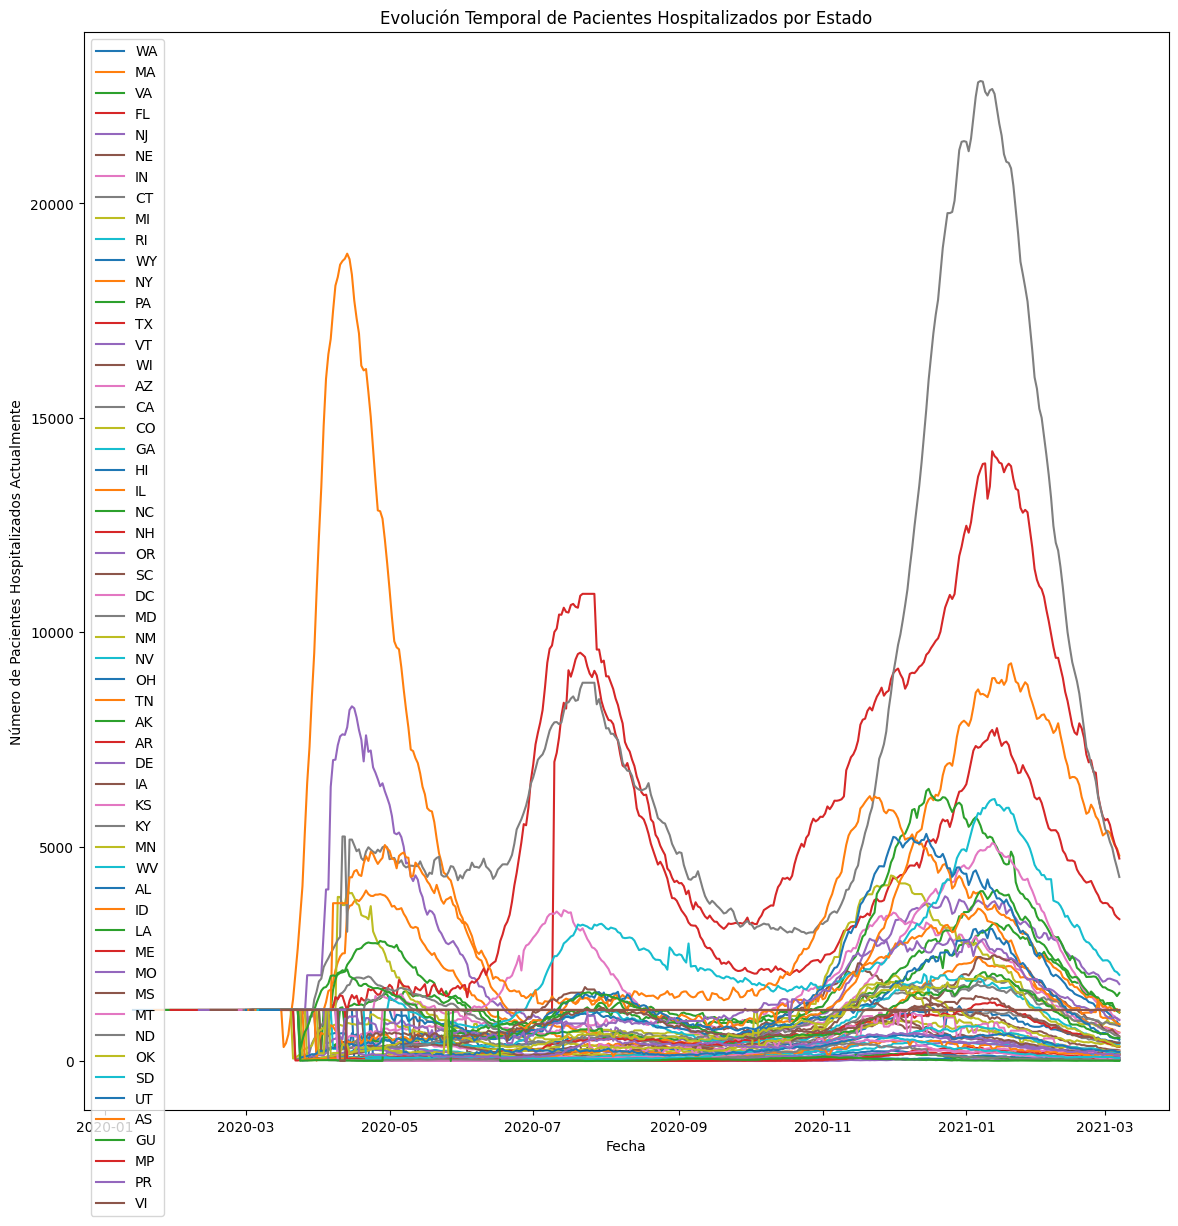

In [ ]:
# Agrupar por fecha y estado y calcular la suma de hospitalizados
df_time_series = df_clean_sin_nulos.groupby(['date', 'state'])['hospitalizedCurrently'].sum().reset_index()

# Filtrar para los estados con valores atípicos
states_with_outliers = df_clean_sin_nulos[df_clean_sin_nulos['state'].isin(df_h_state[df_h_state['hospitalizedCurrently'] > mean_hospitalized]['state'])]

# Graficar la evolución temporal para estos estados
plt.figure(figsize=(14, 14))
for state in df_time_series['state'].unique():
    state_data = df_time_series[df_time_series['state'] == state]
    plt.plot(state_data['date'], state_data['hospitalizedCurrently'], label=state)

plt.xlabel('Fecha')
plt.ylabel('Número de Pacientes Hospitalizados Actualmente')
plt.title('Evolución Temporal de Pacientes Hospitalizados por Estado')
plt.legend()
plt.show()


In [ ]:
# Calcular el número de pacientes hospitalizados por estado
df_h_state = df_clean_sin_nulos.groupby('state')['hospitalized'].sum().reset_index()


# Encuentra el estado con el mayor número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['hospitalized'].idxmax()]

# Encuentra el estado con el menor número de hospitalizados
min_hospitalized_state = df_h_state.loc[df_h_state['hospitalized'].idxmin()]

# Agrega una columna para el color
df_h_state['Color'] = 'skyblue'  # Colores por defecto

# Asigna colores específicos para el máximo y el mínimo
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Nos aseguramos de que la columna 'hospitalized' sea de tipo entero
df_h_state['hospitalized'] = df_h_state['hospitalized'].astype(int)

# Identificar el estado con el máximo y mínimo número de hospitalizados
max_hospitalized_state = df_h_state.loc[df_h_state['hospitalized'].idxmax()]
min_hospitalized_state = df_h_state.loc[df_h_state['hospitalized'].idxmin()]

# Calcular la media de los valores de hospitalización
mean_hospitalized = df_h_state['hospitalized'].mean()

# Crear una columna de color para diferenciar las barras
df_h_state['Color'] = 'skyblue'
df_h_state.loc[df_h_state['hospitalized'] > mean_hospitalized, 'Color'] = 'LightSalmon'
df_h_state.loc[df_h_state['state'] == max_hospitalized_state['state'], 'Color'] = 'red'
df_h_state.loc[df_h_state['state'] == min_hospitalized_state['state'], 'Color'] = 'green'

# Preparar los datos para Bokeh
src = ColumnDataSource(df_h_state)

# Configurar el entorno para mostrar gráficos en Jupyter Notebook
output_notebook()

# Crear el gráfico de barras
p = figure(x_range=df_h_state['state'].tolist(), height=600, width=1400, 
           title='Hospitalizaciones por Estado', toolbar_location=None, tools="")

# Añadir las barras con colores
p.vbar(x='state', top='hospitalized', width=0.8, source=src, color='Color')

# Configurar los ejes y el título
p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label = "Estado"
p.yaxis.axis_label = "hospitalized"
p.title.text_font_size = "16pt"

# Formatear el eje y para evitar notación científica
p.yaxis.formatter = NumeralTickFormatter(format="0,0")

# Añadir una línea horizontal en la media
mean_line = Span(location=mean_hospitalized, dimension='width', line_color='LightSlateGray', line_width=2, line_dash='dashed')
p.add_layout(mean_line)

# Añadir etiquetas de leyenda debajo del gráfico
# Añadir anotaciones para el máximo
labels_max = ColumnDataSource(data=dict(
    x=[max_hospitalized_state['state']],
    y=[max_hospitalized_state['hospitalized']],
    text=[f"Máximo: {max_hospitalized_state['state']}: {max_hospitalized_state['hospitalized']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_max, 
    text_color="red", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Añadir anotaciones para el mínimo
labels_min = ColumnDataSource(data=dict(
    x=[min_hospitalized_state['state']],
    y=[min_hospitalized_state['hospitalized']],
    text=[f"Mínimo: {min_hospitalized_state['state']}: {min_hospitalized_state['hospitalized']:,}"]
))

p.add_layout(LabelSet(
    x='x', y='y', text='text', source=labels_min, 
    text_color="green", x_offset=0, y_offset=10,
    text_font_size="12pt",
    text_align="center"
))

# Mostrar el gráfico
show(p, notebook_handle=True)


Loading BokehJS ...

Los datos sugieren varias cosas interesantes sobre la distribución de los números de pacientes hospitalizados entre los estados:

+ Gran Variabilidad: La diferencia absoluta de 2,640,104 indica una gran disparidad entre el estado con el mayor y el estado con el menor número de pacientes hospitalizados. Esto sugiere que hay una diferencia significativa en la carga de hospitalización entre estos dos estados.

+ Porcentaje de Diferencia Excepcional: El porcentaje de diferencia del 597.59% con respecto a la media es extremadamente alto. Esto indica que la diferencia entre el máximo y el mínimo es casi seis veces la media de los hospitalizados en todos los estados. Este alto porcentaje sugiere que hay un estado con una carga de hospitalización extremadamente alta en comparación con la mayoría de los otros estados, y un estado con una carga muy baja.

+ Posible Desigualdad en Recursos o Situación: Una diferencia tan marcada podría señalar desigualdades en la capacidad de los sistemas de salud o diferencias en las condiciones de salud entre los estados. También podría indicar que algunos estados están enfrentando brotes o situaciones excepcionales que están afectando el número de pacientes hospitalizados.

+ Datos Atípicos o Especiales: La alta disparidad también puede estar influenciada por datos atípicos o eventos específicos en uno o más estados. Por ejemplo, un estado podría estar lidiando con una crisis sanitaria que eleva sus cifras de hospitalización, mientras que otro estado podría tener una situación mucho más controlada.


En resumen, la gran diferencia y el alto porcentaje sugieren que hay una significativa desigualdad en la carga de hospitalización entre los estados, lo cual podría ser indicativo de variaciones en la situación de salud o en la capacidad de los sistemas de salud en esos estados.

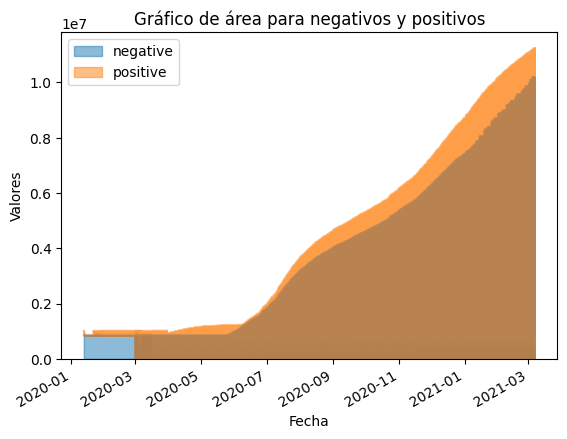

In [ ]:
df_d_n_p = df_clean_sin_nulos[['date', 'negative', 'positive']]

# Create the area plot, setting 'date' as the x-axis
ax = df_d_n_p.plot.area(x='date', alpha=0.5)

# Optionally set axis labels and title
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de área para negativos y positivos')

# Show the plot
plt.show()

Este gráfico muestra la evolución del número de casos negativos y positivos de COVID-19 a lo largo del tiempo. Algunos puntos clave que se pueden observar:

+ 1. Tanto los valores negativos como positivos aumentan de manera exponencial a lo largo del tiempo, lo que sugiere una propagación rápida del virus.

+ 2. La línea naranja que representa los casos positivos crece mucho más rápidamente que la línea gris de los casos negativos, lo que indica que la proporción de casos positivos está aumentando con el tiempo.

+ 3. La brecha entre los valores negativos y positivos se hace cada vez más grande, lo que refleja el incremento significativo en el número de contagios confirmados en comparación con los casos descartados.

En general, este gráfico ilustra la tendencia preocupante de crecimiento exponencial de los casos positivos de COVID-19, lo cual sugiere la necesidad de medidas efectivas para controlar la propagación del virus.

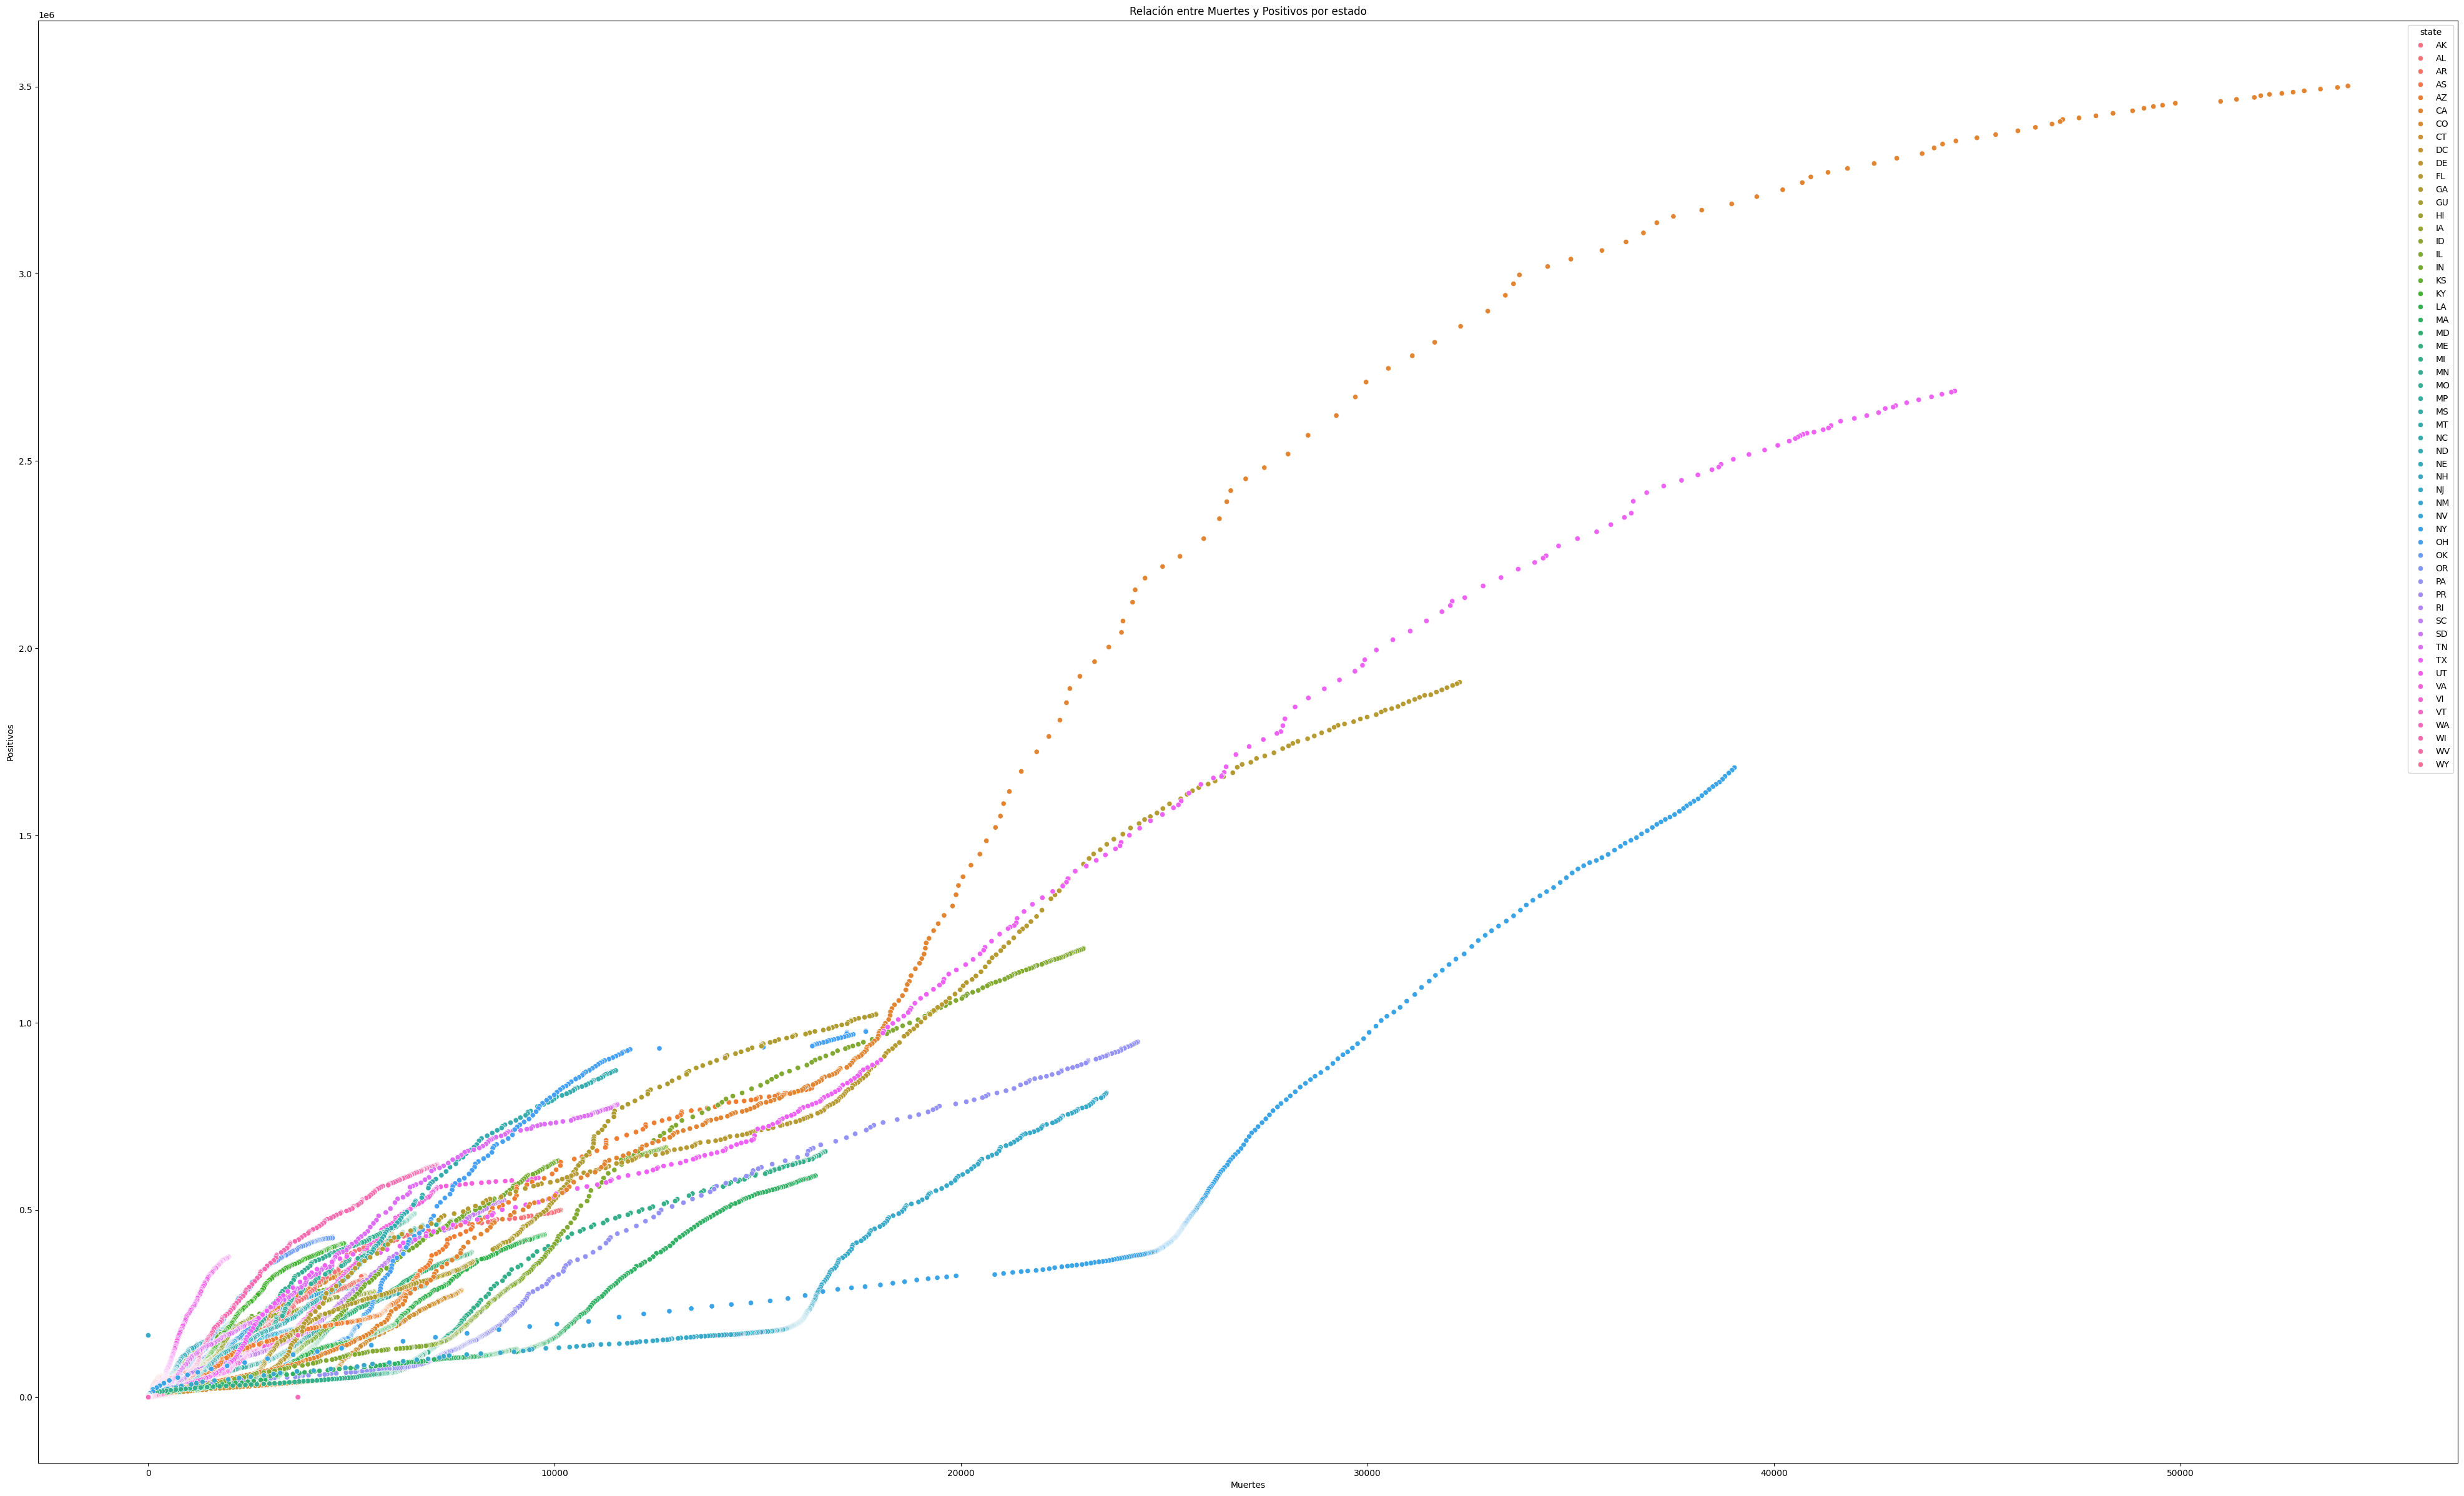

In [ ]:
plt.figure(figsize=(50, 30))
sns.scatterplot(x='death', y='positive', data=df_clean_sin_nulos, hue='state')
plt.title('Relación entre Muertes y Positivos por estado')
plt.xlabel('Muertes')
plt.ylabel('Positivos')
plt.show()

Este gráfico muestra la relación entre el número de muertes y el número de casos positivos por COVID-19 a lo largo del tiempo para diferentes estados. Algunas observaciones importantes:

La curva tiene una forma exponencial, lo que indica un crecimiento acelerado tanto en muertes como en casos positivos a medida que avanza la pandemia.

Cada línea de color representa un país o región diferente, y se puede observar una gran variabilidad en la relación entre muertes y casos positivos entre ellos.

Algunos estados muestran una pendiente más pronunciada, lo que sugiere una tasa de mortalidad más alta en relación a los casos confirmados, mientras que otros presentan una curva más plana, indicando una menor tasa de letalidad.
La dispersión de las líneas a medida que avanzan en el tiempo refleja la diferencia en la evolución de la pandemia y en la efectividad de las medidas adoptadas por los diferentes estados para contener la propagación del virus y reducir el impacto en términos de vidas perdidas.